# Support Vector Machine (SVM)

## ie10

In [19]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [21]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
df["target"] = iris.target
print(df)
print(iris.target_names)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [39]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
df["flower_name"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
print(df0.head())
print(df1.head())
print(df2.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0   

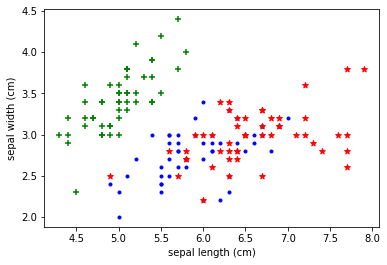

In [65]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker="+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue", marker=".")
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], color="red", marker="*")

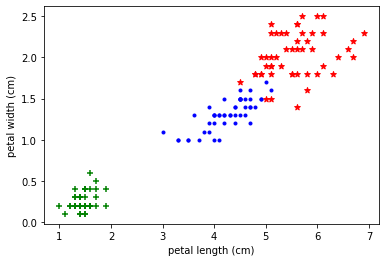

In [66]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="green", marker="+")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="blue", marker=".")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color="red", marker="*")

In [70]:
from sklearn.model_selection import train_test_split
x = df.drop(["target", "flower_name"], axis="columns")
print(x)
y = df.target
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [76]:
import numpy as np
np.random.seed(23)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
len(x_test)

30

In [77]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
139,6.9,3.1,5.4,2.1
125,7.2,3.2,6.0,1.8
67,5.8,2.7,4.1,1.0
3,4.6,3.1,1.5,0.2
113,5.7,2.5,5.0,2.0
52,6.9,3.1,4.9,1.5
18,5.7,3.8,1.7,0.3
137,6.4,3.1,5.5,1.8
20,5.4,3.4,1.7,0.2
64,5.6,2.9,3.6,1.3


In [91]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9666666666666667

## sample

[0]


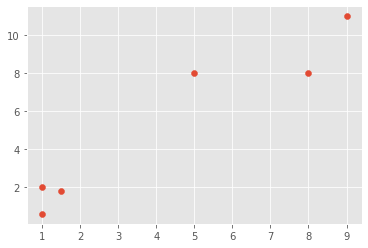

In [101]:
# https://stackoverflow.com/questions/45554008/error-in-python-script-expected-2d-array-got-1d-array-instead
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import style
# style.use("ggplot")
from sklearn import svm
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]
plt.scatter(x,y)
# plt.show()
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])
y = [0,1,0,1,0,1]
# X.reshape(1, -1)
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)
test = [[0.58,0.76]]
print(clf.predict(test))

## ie10

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
target: 0
target: 1
target: 2
target names: [0 1 2 3 4 5 6 7 8 9]
    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0 

<Figure size 432x288 with 0 Axes>

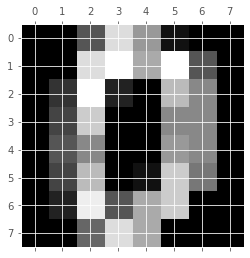

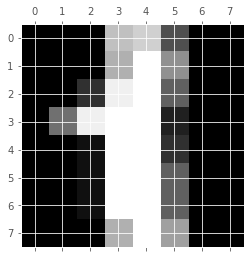

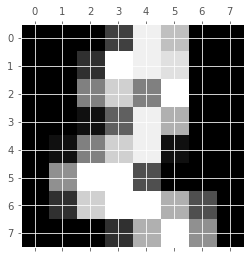

In [148]:
digits = load_digits()
print(dir(digits))
print(digits.data[0])
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])
    print("target:", digits.target[i])
print("target names:", digits.target_names)
df = pd.DataFrame(digits.data,digits.target)
print(df.head())
df['target'] = digits.target
print(df.head(20))

In [112]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(23)
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8)
print(len(x_test))

360


In [113]:
x_test

array([[ 0.,  0.,  0., ...,  7.,  0.,  0.],
       [ 0.,  0.,  0., ..., 14.,  1.,  0.],
       [ 0.,  0., 12., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  2., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 14.,  2.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.]])

In [170]:
from sklearn.svm import SVC
lm_model = SVC(kernel="linear")
lm_model.fit(x_train, y_train)
lm_model.score(x_train, y_train)

1.0

In [155]:
poly_model = SVC(kernel="poly")
poly_model.fit(x_train, y_train)
poly_model.score(x_train, y_train)

0.9993041057759221

In [156]:
rbf_model = SVC(kernel="rbf")
rbf_model.fit(x_train, y_train)
rbf_model.score(x_train, y_train)

0.9965205288796103

In [157]:
sigmoid_model = SVC(kernel="sigmoid")
sigmoid_model.fit(x_train, y_train)
sigmoid_model.score(x_train, y_train)

0.9151009046624913

In [160]:
# Precomputed matrix must be a square matrix. Input is a 1437x64 matrix.

In [173]:
import pickle
with open("model_pickle", "wb") as f:
    pickle.dump(lm_model, f)
with open("model_pickle", "rb") as f:
    mp = pickle.load(f)
print("coef:",mp.coef_)
print("intercept:",mp.intercept_)

coef: [[ 0.          0.          0.0002862  ... -0.01641305 -0.0066348
  -0.0026374 ]
 [ 0.         -0.00025697 -0.01640406 ... -0.01992621 -0.02527313
  -0.01122714]
 [ 0.          0.00023982 -0.0059115  ... -0.01455326 -0.00285795
  -0.0005439 ]
 ...
 [ 0.          0.01535383  0.02149751 ... -0.0471836  -0.01800716
   0.        ]
 [ 0.          0.01161192  0.0392186  ... -0.04518871 -0.00683732
  -0.00042733]
 [ 0.          0.00654906  0.00280349 ... -0.05552618 -0.01360001
  -0.00269279]]
intercept: [-7.23530281e-01  6.83789032e-01  5.45108024e-01 -5.44093485e-01
 -5.07613552e-02  3.27491232e-01 -1.50161123e-01  1.98820377e-01
  7.04675619e-01  4.03404065e-01  5.40603215e-01 -2.66727999e+00
  8.28234204e-01  4.78621213e-01 -8.19045984e-01 -1.51325532e+00
  1.31953591e+00 -7.05004938e-01 -9.28995613e-01 -4.43055974e-01
  3.29023911e-01 -3.75703380e-02  5.96034268e-01 -3.18035153e-01
 -3.50169459e-01 -5.12723467e-05 -1.21324550e-01  4.99979139e-01
  7.42882377e-01  2.10976603e+00  1.0

In [178]:
import joblib
joblib.dump(lm_model, "model_joblib")
mj = joblib.load("model_joblib")
print("coef:",mj.coef_)
print("intercept:",mj.intercept_)

coef: [[ 0.          0.          0.0002862  ... -0.01641305 -0.0066348
  -0.0026374 ]
 [ 0.         -0.00025697 -0.01640406 ... -0.01992621 -0.02527313
  -0.01122714]
 [ 0.          0.00023982 -0.0059115  ... -0.01455326 -0.00285795
  -0.0005439 ]
 ...
 [ 0.          0.01535383  0.02149751 ... -0.0471836  -0.01800716
   0.        ]
 [ 0.          0.01161192  0.0392186  ... -0.04518871 -0.00683732
  -0.00042733]
 [ 0.          0.00654906  0.00280349 ... -0.05552618 -0.01360001
  -0.00269279]]
intercept: [-7.23530281e-01  6.83789032e-01  5.45108024e-01 -5.44093485e-01
 -5.07613552e-02  3.27491232e-01 -1.50161123e-01  1.98820377e-01
  7.04675619e-01  4.03404065e-01  5.40603215e-01 -2.66727999e+00
  8.28234204e-01  4.78621213e-01 -8.19045984e-01 -1.51325532e+00
  1.31953591e+00 -7.05004938e-01 -9.28995613e-01 -4.43055974e-01
  3.29023911e-01 -3.75703380e-02  5.96034268e-01 -3.18035153e-01
 -3.50169459e-01 -5.12723467e-05 -1.21324550e-01  4.99979139e-01
  7.42882377e-01  2.10976603e+00  1.0